#5-1. 결정 트리

In [ ]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine-date')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
wine.info() #데이터프레임의 각 열의 데이터 타입과 누락된 데이터 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wine.describe() #열에 대한 간랸한 통계(최소,최대,평균값 등)

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state=42)

- train_test_spilt() 함수는 설정 값을 지정하지 않으면 25% 테스트로 세트 지정
- test_size는 20% 정도만 테스트 세트로 나누겠다는 의미이다.

In [ ]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

##로지스틱회귀

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [ ]:
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


##결정트리
: 불순도 기준으로 정보 이득이 최대가 되도록 노드를 분할하는 것
- 노드를 순수하게 나눌수록 정보 이득이 크다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


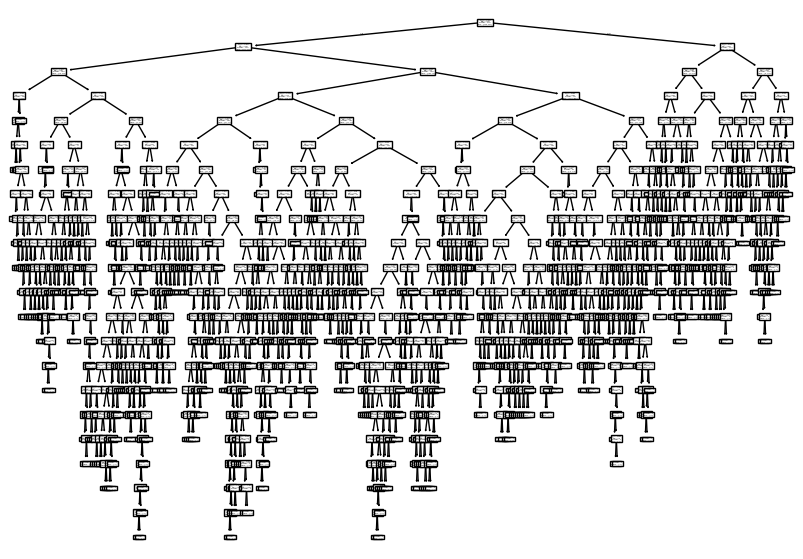

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7)) #너비10, 높이 7 크기의 그림 크기 설정
plot_tree(dt)
plt.show()

- 루트 노드: 맨 위의 노드
- 리프 노드: 맨 아래 끝에 달린 노드

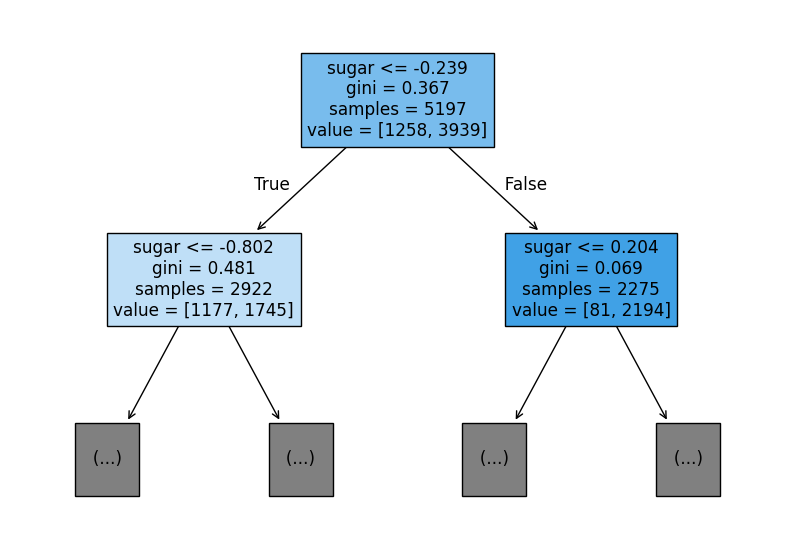

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth = 1, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

- max_depth 매개변수는 루트 노드를 제외하고 확장할 노드의 수를 적는 것이다.
- filled는 클래스에 맞게 노트의 색을 칠하는데, 어떤 클래스의 비율이 높아지면 점점 진한 색으로 표시한다.
- feature_names 은 특성의 이름을 전달하는 것이다.

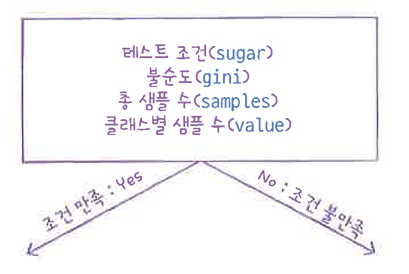

###불순도
: 결정 트리가 최적의 질문을 찾기 위한 기준

- gini는 지니 불순도를 의미한다.
- criterion은 노드에서 데이터를 분할할 기준을 정하는 것인데 기본값이 'gini'이다.
- 지니 불순도 = 1-(음성클래스비율^2 + 양성클래스비율^2)
- 순수 노드: 지니 불순도가 0으로 하나의 클래스가 있을 경우이다.
- 지니 불순도가 0.5일 경우가 최악이다.

- 정보 이득: 부모와 자식 노드 사이의 불순도 차이, 결정트리 알고리즘은 정보이득이 최대화되도록 학습
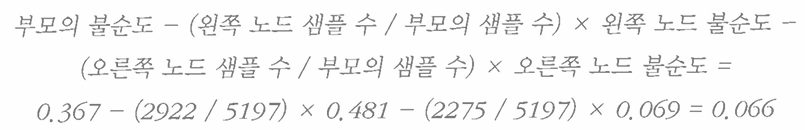
- 엔트로피 불순도는 criterion='entropy'로 지정하면 되는데, 이때 노드의 클래스 비율을 사용하지만 지니 불순도처럼 제곱이 아니라 밑이 2인 로그를 사용하여 곱한다.
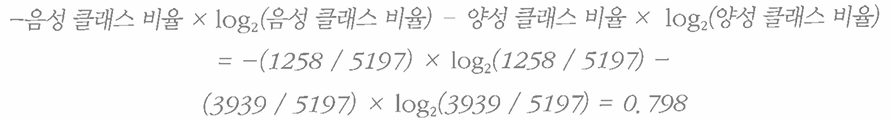


###가지치기
: 결정트리의 성장을 제한하는 방법

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


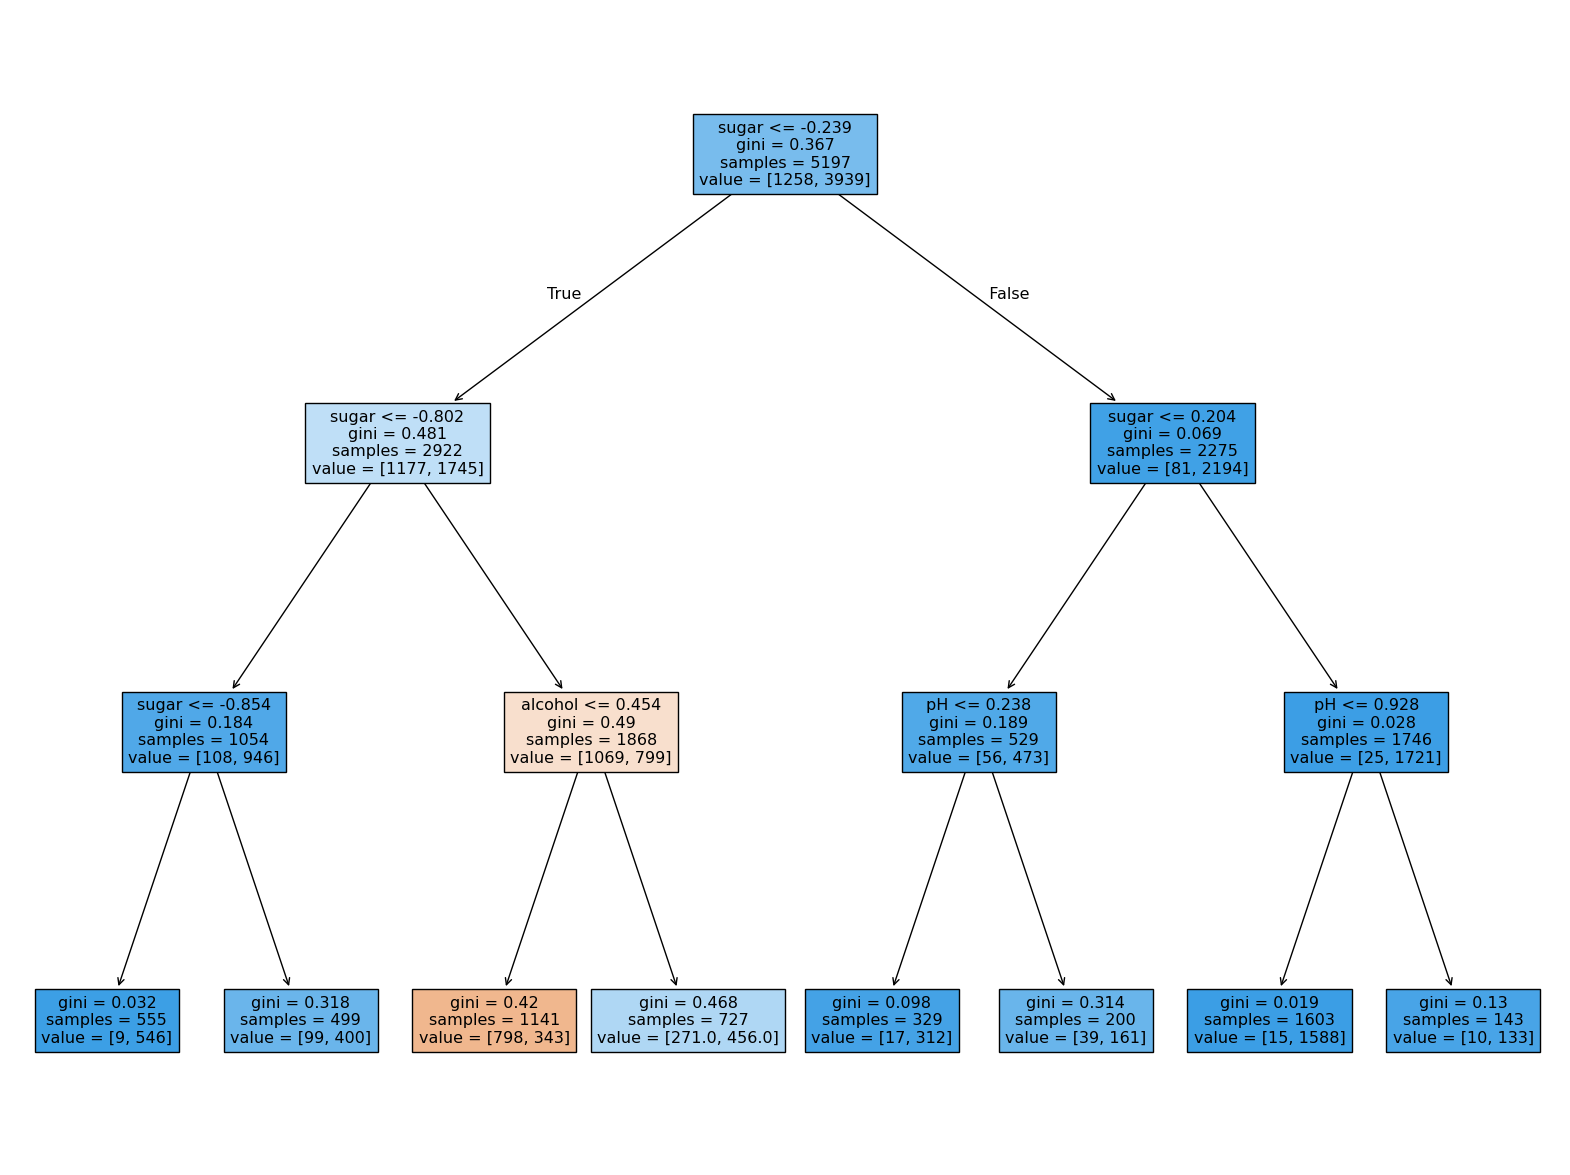

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

- 특성값의 스케일은 결정 트리 알고리즘에 아무런 영향을 미치지 않는다. 그러므로 표준화 전처리를 할 필요가 없다.

In [ ]:
dt = DecisionTreeClassifier(max_depth = 3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


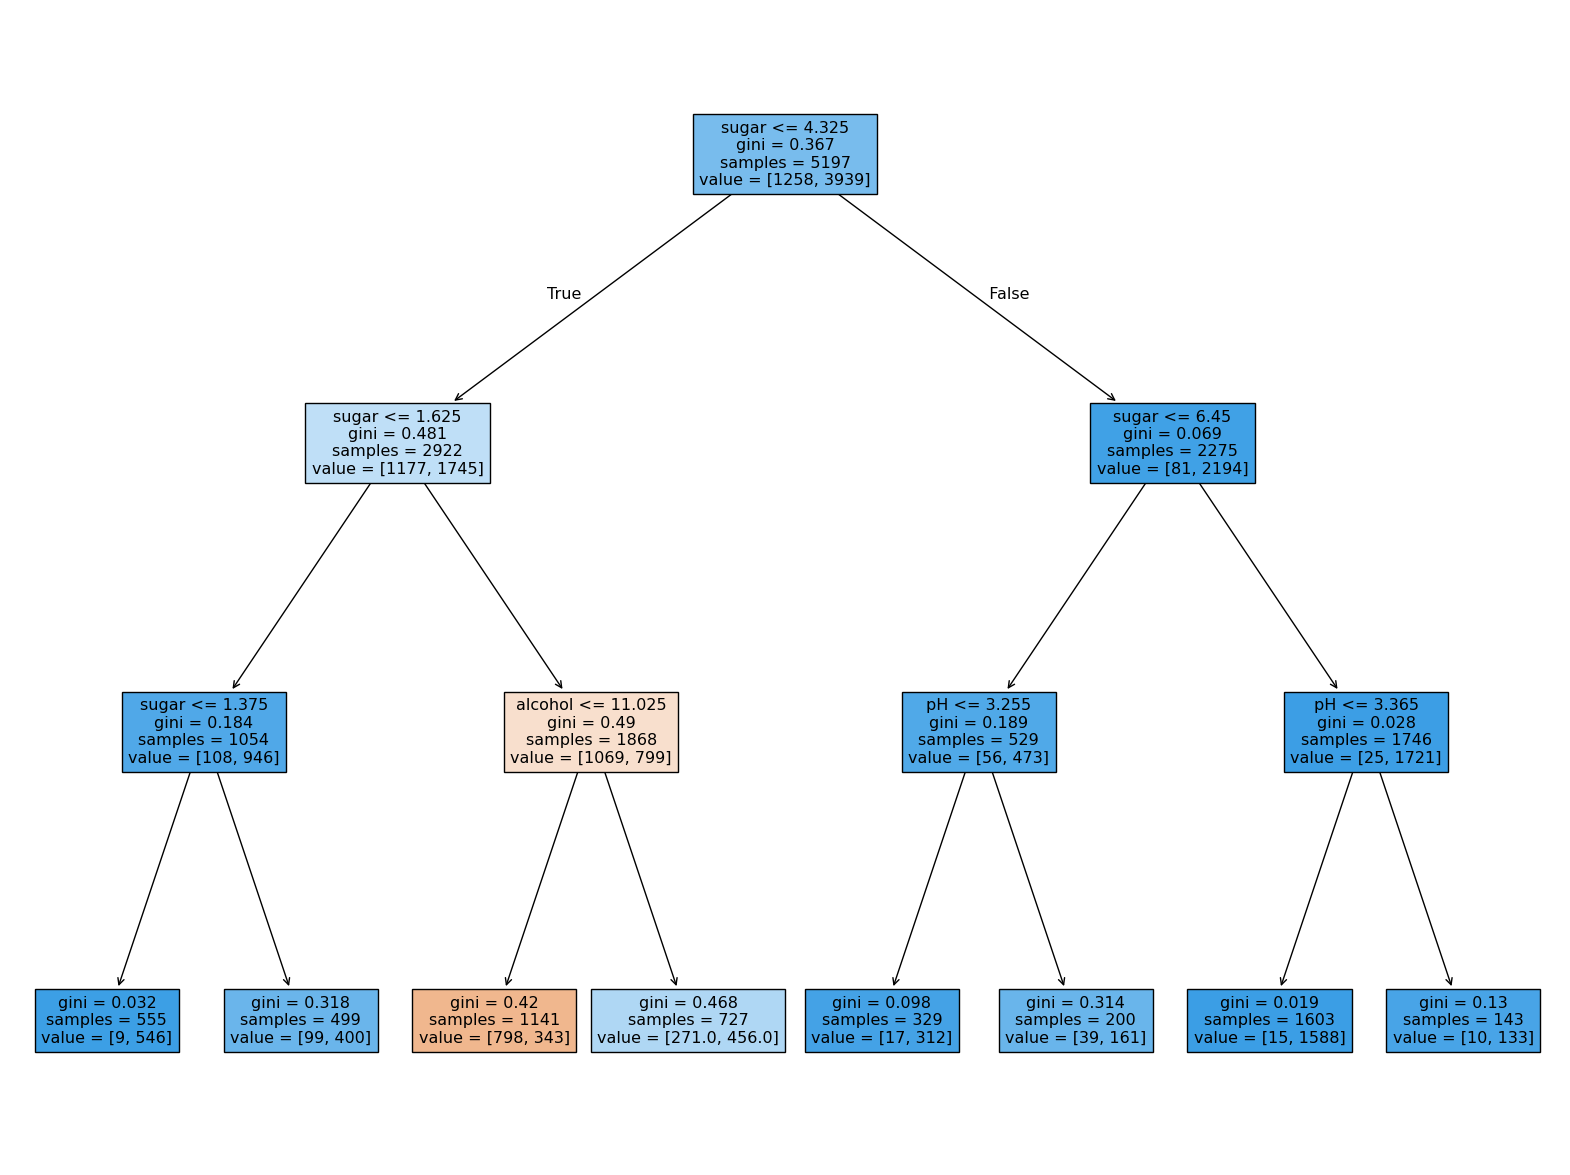

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True, feature_names = ['alcohol','sugar','pH'])
plt.show()

In [ ]:
print(dt.feature_importances_) #특성 중요도(알콜, 슈거, 산도값)

[0.12345626 0.86862934 0.0079144 ]


- 특성 중요도: 결정 트리에 사용된 특성이 불순도를 감소하는데 기여한 정도를 나타내는 값

#5-2. 교차 검증과 그리드 서치

##검증 세트
: 하이퍼파라미터 튜닝을 위해 모델을 평가할 때 테스트 세트를 사용하지 않기 위해 훈련 세트에서 다시 떼어 낸 데이터 세트

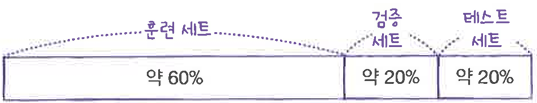

In [ ]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine-date')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state= 42)

In [ ]:
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)
print(sub_input.shape, val_input.shape) # 훈련세트, 검증세트

(4157, 3) (1040, 3)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


##교차 검증
: 훈련세트를 여러 폴드로 나눈 다음 한 폴드가 검증 세트의 역할을 하고 나어미 폴드에서는 모델을 훈련한다. ex) K-폴드 교차 검증

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.01102662, 0.00819016, 0.00866461, 0.00995064, 0.00850201]), 'score_time': array([0.00151372, 0.00147843, 0.00149131, 0.00224853, 0.0015049 ]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


- cross_validate() 함수는 기본적으로 5-폴드 교차 검증을 수행한다. cv매개변수로 폴드 수 변경 가능
- fit_time, score_time 키는 각각 모델 훈련하는 시간과 검증히는 시간을 의미
- 교차 검증의 최종 점수는 test_score인 검증 폴드의 점수를 평균하여 얻는다.

In [ ]:
import numpy as np
print(np.mean(scores['test_score']))

0.855300214703487


In [ ]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv = StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


- cross_validate() 는 훈련세트를 섞어 폴드를 나누지 않음, 섞으려면 분할기(spliter) 지정
- KFold: 회귀 모델일 경우, 데이터 비율이 균등하지 않을 수 있음
- StratifiedKFold: 분류 모델일 경우, 타깃 클래스의 비율을 유지

In [ ]:
splitter = StratifiedKFold(n_splits =10, shuffle=True, random_state=42) #훈련 세트를 섞은 후 10-폴드 교차 검증을 수행
scores = cross_validate(dt,train_input, train_target, cv = splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


##하이퍼파라미터 튜닝
: 모델이 학습할 수 없어서 사용자가 지정해야만 하는 파라미터

그리드 서치: 하이퍼파라미터 탐색을 자동화해 주는 도구로, 탐색할 매개변수를 나열하면 교차 검증을 수행하여 가장 좋은 검증 점수의 매개변수 조합을 선택한다.

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]} #최소 불순도 감소값

In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),params, n_jobs=1)

- GridSearchCV의 cv 매개변수 기본값 5
- min_impurity_decrease 값마다 5-폴드 교차 검증을 수행하기 대문에 5x5=25개의 모델 훈련
- n_jobs매개변수는 병렬 시행에 사용할 CPU 코어 수를 지정하는 것이다. 기본값은 1, -1로 지정시 모든 코어를 사용

In [ ]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

- 그리드 서치는 훈련이 끝나면 25개 모델 중 검증 점수가 가장 높은 모델의 매개변수 조합으로 전체 훈련세트에서 자동으로 다시 모델을 훈련

In [ ]:
dt = gs.best_estimator_ #가장 점수 높은 모델의 매개변수 조합
print(dt.score(train_input, train_target))

0.9615162593804117


In [ ]:
print(gs.best_params_) #최적의 매개변수

{'min_impurity_decrease': 0.0001}


In [ ]:
print(gs.cv_results_['mean_test_score']) #교차 검증의 평균 점수

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [ ]:
best_index = np.argmax(gs.cv_results_['mean_test_score']) #가장 큰 값의 인덱스
print(gs.cv_results_['params'][best_index]) #params키에 저장된 매개변수 출력 -> 최상의 검증 점수를 만든 매개변수 조합(gs.best_params_와 동일)

{'min_impurity_decrease': 0.0001}


In [ ]:
params = {'min_impurity_decrease' : np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)}

In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),params, n_jobs=-1)
gs.fit(train_input, train_target)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [ ]:
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


##랜덤 서치
: 연속된 매개변수 값을 탐색할 때 유용, 탐색할 값을 직접 나열하는 것이 아니라 탐색 값을 샘플링할 수 있도록 확률 분포 객체를 전달한다.

In [ ]:
from scipy.stats import uniform, randint

- randint는 정숫값을 뽑는다.
- uniform은 실숫값을 뽑는다.

In [ ]:
rgen = randint(0,10)
rgen.rvs(10)

array([3, 0, 5, 4, 9, 3, 1, 9, 2, 0])

In [ ]:
np.unique(rgen.rvs(1000), return_counts=True) #1000개 샘플링해서 각 숫자 개수 세기

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 98, 112, 100,  91,  93, 100,  94, 101, 107, 104]))

In [ ]:
ugen = uniform(0, 1)
ugen.rvs(10)

array([0.61758926, 0.02189798, 0.35021629, 0.22157648, 0.79946967,
       0.59898898, 0.99256891, 0.77421779, 0.42211197, 0.37743334])

In [ ]:
params = {'min_impurity_decrease' : uniform(0.0001, 0.001),
          'max_depth':randint(20,50),
          'min_samples_split':randint(2,25),
          'min_samples_leaf':randint(1,25),
          }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42),params,
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b620c80b7f0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b620c80b1f0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b620c80af20>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b620c808100>},
                   random_state=42)

- 랜덤 서치 클래스는 RandomizedSearchCV이고 샘플링 횟수는 n_iter매개변수이다.

In [ ]:
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8695428296438884


In [ ]:
dt = gs.best_estimator_
print(dt.score(test_input, test_target))

0.86


#5-3. 트리의 앙상블

- 정형 데이터: CSV파일이 가지런히 정리되어 있는 파일, 어떤 구조로 되어있다는 뜻
- 비정형 데이터: 데이터베이스나 엑셀로 표현하기 어려운 것 ex)텍스트 데이터, 사진, 디지털 음악

- 앙상블 학습: 대부분 결정트리 기반으로 만들어져 있다.

##랜덤 포레스트
: 앙상블 학습의 대표 주자 중 하나로, 결정트리를 랜덤하게 만들어 결정 트리의 숲을 만든다.

- 부트스트랩 샘플: 복원추출로, 데이터에서 중복을 허용하여 데이터를 샘플링하는 방식을 의미한다.
- 분류모델은 전체 특성 개수의 제곱근만큼의 특성을 선택하지만, 회귀 모델은 전체 특성을 사용한다.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
wine = pd.read_csv('https://bit.ly/wine-date')
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [3]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


- return_train_score 매개변수는 검증 점수와 훈련세트에 대한 점수를 같이 반환한다., 기본값은 False이기 때문에 실행하려면 True로 바꿔야 한다.
- CPU코어도 병렬로 교차 검증을 한다.


In [4]:
rf.fit(train_input, train_target)
print(rf.feature_importances_) #특성 중요도

[0.23167441 0.50039841 0.26792718]


- 앞의 결정트리 특성 중요도는 [ 0.12345626 0.86862934 0.0079144 ] 이다.
- 랜덤포레스트 알코올 도수와 pH가 상승한 이유는 특성의 일부를 랜덤하게 선택하여 결정트리를 훈련하기 때문이다.
- 이는 하나의 특성에 과도하게 집중하지 않고 좀 더 많은 특성이 훈련에 기여할 기회를 얻는다.

In [5]:
rf = RandomForestClassifier(oob_score = True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


-  oob_score은 부트스트랩 샘플에 포함되지 않고 남는 샘플로, 기본값은 False이다.

##엑스트라 트리
: 랜덤 포레스트와 비슷하게 결정 트리를 사용하여 앙상블 모델을 만들지만 부트스트랩 샘플을 사용하지 않는다.
- 즉, 각 결정 트리를 만들 때 전체 훈련 세트를 사용한다.
- 무작위성이 좀 더 크기 때문에 랜덤 포레스트보다 더 많은 결정 트리를 훈련한다.

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores=cross_validate(et, train_input, train_target,
                      return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [6]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


##그레이디언트 부스팅
: 랜덤 포레스트나 엑스트라 트리와 달리 결정 트리를 연속적으로 추가하여 손실 함수를 최소화하는 앙상블 방법
- 기본적으로 깊이가 3인 결정 트리를 100개 사용
- 즉, 경사 하강법 처럼 결정트리를 계속 추가하면서 손실 함수의 낮은 곳으로 천천히 조금씩 이동해야 한다.
- 성능은 뛰어나지만 병렬로 훈련이 불가능해서 순서대로 트리를 추가하기 때문에 훈련 속도가 느리다.

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [8]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2,
                                random_state=42) #결정트리 개수 500개 늘림
scores = cross_validate(gb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


- 학습률 learning_rate의 기본값은 0.1

In [9]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15887763 0.6799705  0.16115187]


- subsample는 트리 훈련에 사용할 훈련 세트의 비율을 정한다. 기본값은 1.0 으로 전체 훈련 세트를 사용한다.

##히스토그램 기반 그레이디언트 부스팅
: 정형 데이터를 다루는 머신러닝 알고리즘 중에 가장 인기가 높은 알고리즘이다.
- 훈련 데이터를 256개의 구간으로 변환하여 사용하기 때문에 노드 분할 속도가 매우 빠르다.

In [6]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


- HistGradientBoostingClassifier에는 트리 개수를 지정하는데 n_estimators대신 부스팅 반복 횟수를 지정하는 max_iter를 사용한다.

In [8]:
from sklearn.inspection import permutation_importance
#히스토그램 기반 그레이디언트 부스팅의 특성 중요도 계산

hgb.fit(train_input, train_target)
result= permutation_importance(hgb, train_input, train_target,
                               n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


- n_repeats는 랜덤하게 섞을 횟수로 기본값은 5이다.
- permutation_importance 함수가 반환하는 객체는 특성 중요도(importances), 평균(importances_mean), 표준 편차(importances_std)를 담고 있다.

In [10]:
result = permutation_importance(hgb, test_input, test_target,
                                n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [11]:
hgb.score(test_input, test_target)

0.8723076923076923

###XGBoost

In [12]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9558403027491312 0.8782000074035686


- 히스토그램 기반 그레이디언트 부스팅 알고리즘을 구현한 라이브러리 중 하나는 'XGBoost'이다.
- tree_method 매개변수를 'hist' 로 지정하면 히스토그램 기반 그레이디트 부스팅을 사용할 수 있다.

###LightGBM

In [13]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884
